In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
# Checking for any null values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
# Checking the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Looking at the distribution of categorical variables
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['children'].value_counts())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


The data seems to be clean so no data imputation is needed

Now we will convert the categorical variables to number since in the model building part, the models can be use only numbers

In [7]:
# Replacing the categorical variables to numbers 
clean_num={'sex':{'female':1,'male':0},
          'smoker':{'no':0,'yes':1},
          'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3}}
df.replace(clean_num,inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


Now we would want to see what is the pattern of how insurance varies with different variables.

We would normally expect:
- The charges will increase as the age, bmi increases.
- The charges would be higher for a smoker 
- Charges may have some biasness over gender.
- Charges maybe higher for the people with more number of children
- And there is no relation between region and the charge
- Age binning might help

Now we would see how many of our assumptions are correct.

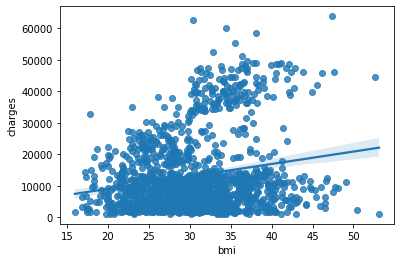

In [39]:
# Scatter plot
sns.regplot(data=df,x='bmi',y='charges')

It can be seen that in some part of the scatter plot there is less increase in charges with bmi, while in some other part there is a huge increase in charges with bmi. So it is reasonable to say that some other feature is interfering with this feature.

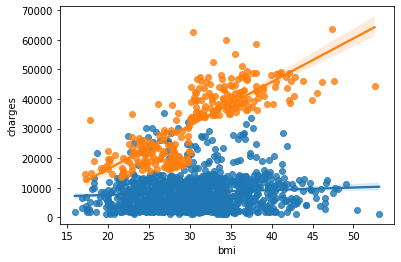

In [38]:
# Scatter plot
sns.regplot(data=df[df['smoker']==0],x='bmi',y='charges')
sns.regplot(data=df[df['smoker']==1],x='bmi',y='charges')

Now we can say that 'bmi' is good predictor of charges when people are smoking. It can make a very important factor if we use tree model.

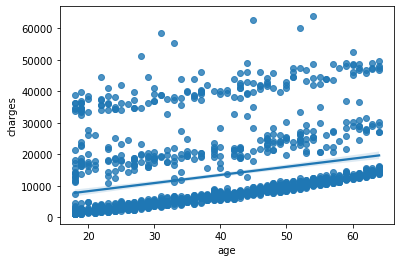

In [27]:
sns.regplot(data=df,x='age',y='charges')

Here we are able to see that the scatter plots are having three different parts, which seems like 3 or 2 different scatter plots.

Here we can say that only age is not a sufficient factor in the decision of charges. It has to combined with some other feature to make it a better deciding feature.

Also the relation is quite linear so we should not be binning the ages.

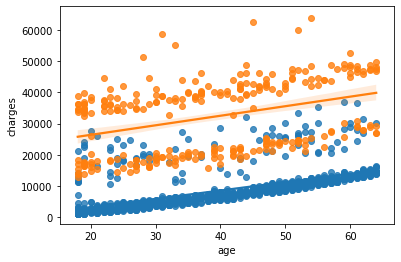

In [31]:
sns.regplot(data=df[df['smoker']==0],x='age',y='charges')
sns.regplot(data=df[df['smoker']==1],x='age',y='charges')

It seems that the smoking is a major factor which is interfering with the age.


But it also seems the again both combinely are not sufficient to explain charges.

From here we can make some inference about our model that using a decision tree model would be a good choice for this data.Also now we can say age is an important factor in deciding charges, and we will not do any feature engineering for age.

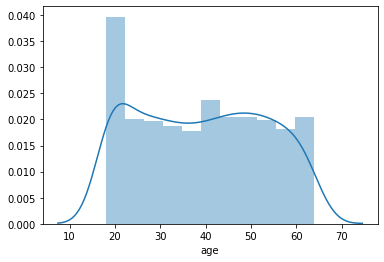

In [32]:
# Distribution plots
sns.distplot(df['age'])

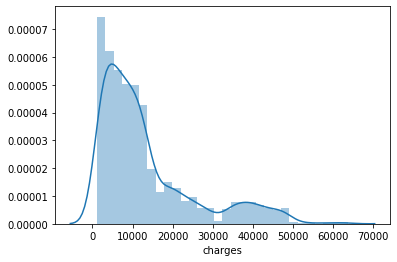

In [14]:
sns.distplot(df['charges'])

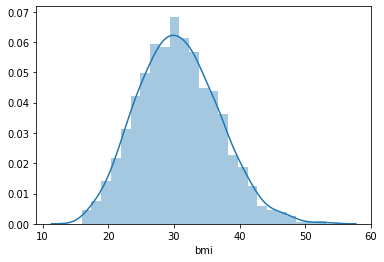

In [15]:
sns.distplot(df['bmi'])

The sample distribution of BMI is normal 

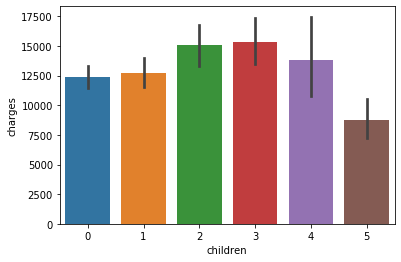

In [44]:
sns.barplot(x='children',y='charges',data=df)

It can be seen that upto 3 children the insurance amount is increasing, which is predictable as the more child will be covered the larger will be the amount.

However it can be seen that after 3 children, charges is decreasing. This can be due to some scheme under which large concession would have been given to families with more than 3 children.

Although there may be some external factors involved, we can say that this is an important feature in determining the prices.

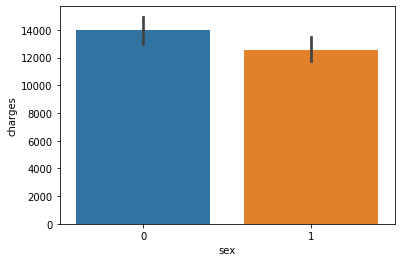

In [36]:
sns.barplot(x='sex',y='charges',data=df)

There are a very small variation in charges with respect to sex. But we will keep this feature for determining the charges.

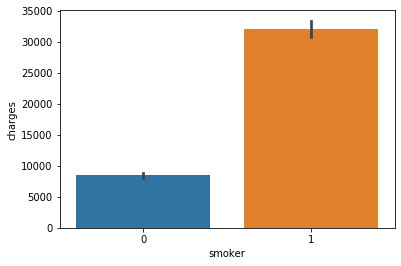

In [37]:
sns.barplot(x='smoker',y='charges',data=df)

As it can be seen, a smoker pays a lot more than non smokers. 

This is an extremely useful feature and will be used for determining charges.

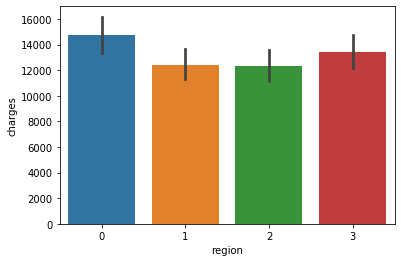

In [49]:
sns.barplot(x='region',y='charges',data=df)

There is vary slight variation in the charges with respect to regions.

But we will use this feature to determine the charges.

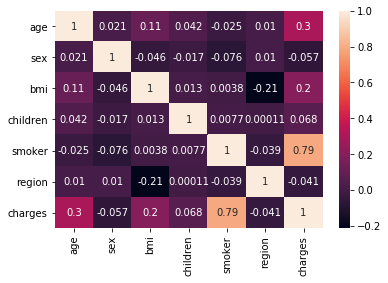

In [50]:
sns.heatmap(df.corr(),annot=True)

In [64]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(df[['age','bmi']])
df[['age','bmi']]=scale.transform(df[['age','bmi']])

In [65]:
x=df[['age','bmi','smoker']]
y=df['charges']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
yhat=reg.predict(x_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.7635045653055261

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
yhat2=pipe.predict(x_test)
r2_score(y_test,yhat2)

0.8510346324294658